In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('malariadeathdata.csv')
deaths = df.iloc[:,[3,4,7,9,23,29]]

In [3]:
#filter out no malaria death countries
death = []
for i in deaths['Value']:
    if i == 'No malaria' or i == '0':
        death.append(False)
    else:
        death.append(True)
death_cleaned = deaths[death]

In [4]:
#grouping countries into each region
AMR_death = death_cleaned[death_cleaned['ParentLocationCode'] == 'AMR']
AFR_death = death_cleaned[death_cleaned['ParentLocationCode'] == 'AFR']
EMR_death = death_cleaned[death_cleaned['ParentLocationCode'] == 'EMR']
SEAR_death = death_cleaned[death_cleaned['ParentLocationCode'] == 'SEAR']
WPR_death = death_cleaned[death_cleaned['ParentLocationCode'] == 'WPR']

In [6]:
#calculate total deaths/year for each region, from 2010-2020

AMR_death_total = AMR_death.groupby('Period').agg(np.sum) #calculating total deaths/year for each region
AMR_2 = AMR_death_total.reset_index() #reset index
AMR_3 = AMR_2[AMR_2['Period']>= 2010] #extract years 2010-2020
AMR_death_total_final = AMR_3.set_index('Period') #set period column back to index

AFR_death_total = AFR_death.groupby('Period').agg(np.sum).reset_index()
AFR_2 = AFR_death_total[AFR_death_total['Period']>= 2010]
AFR_death_total_final = AFR_2.set_index('Period')

EMR_death_total = EMR_death.groupby('Period').agg(np.sum).reset_index()
EMR_2 = EMR_death_total[EMR_death_total['Period']>= 2010]
EMR_death_total_final = EMR_2.set_index('Period')

SEAR_death_total = SEAR_death.groupby('Period').agg(np.sum).reset_index()
SEAR_2 = SEAR_death_total[SEAR_death_total['Period']>= 2010]
SEAR_death_total_final = SEAR_2.set_index('Period')

WPR_death_total = WPR_death.groupby('Period').agg(np.sum).reset_index()
WPR_2 = WPR_death_total[WPR_death_total['Period']>= 2010]
WPR_death_total_final = WPR_2.set_index('Period')

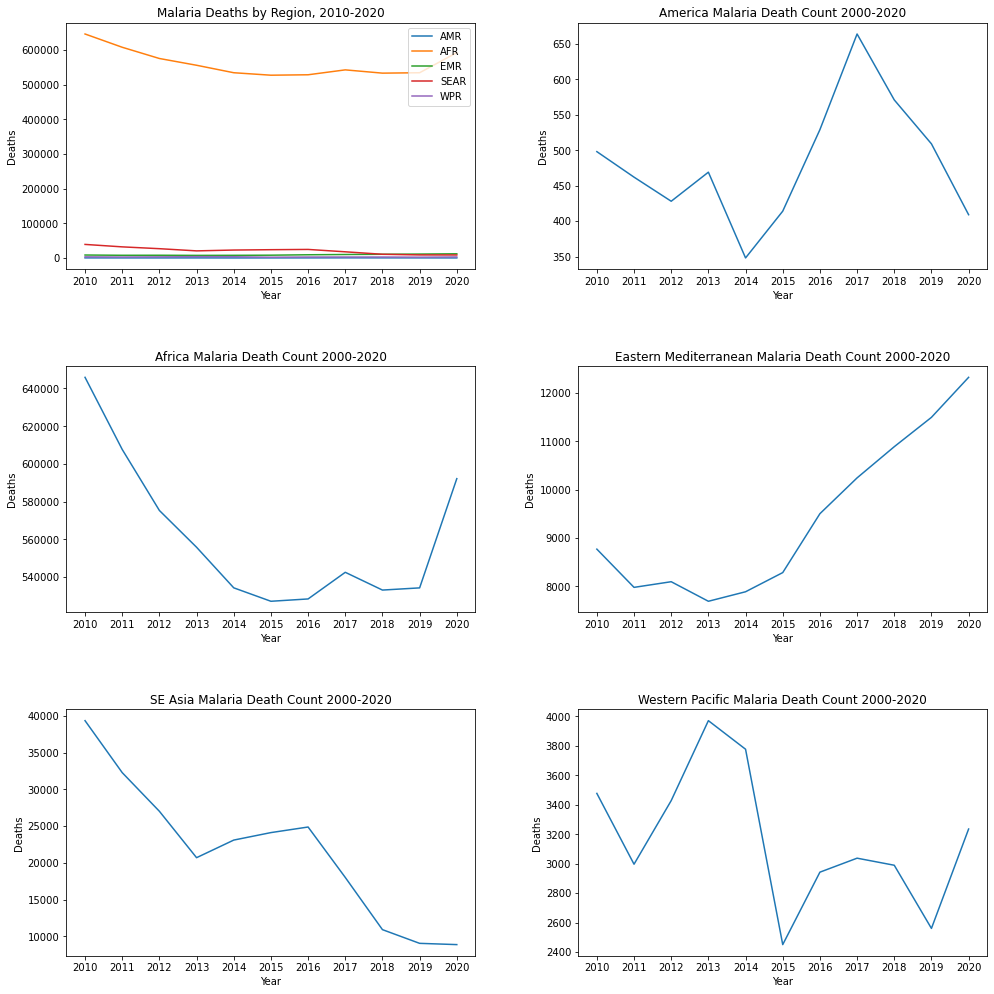

In [7]:
#plotting each region's total deaths per year
fig, ax = plt.subplots(3,2, figsize = (15,15))

#graph with all regions data
ax[0,0].plot(AMR_death_total_final, label = 'AMR')
ax[0,0].plot(AFR_death_total_final, label = 'AFR')
ax[0,0].plot(EMR_death_total_final, label = 'EMR')
ax[0,0].plot(SEAR_death_total_final, label = 'SEAR')
ax[0,0].plot(WPR_death_total_final, label = 'WPR')
ax[0,0].legend(loc='upper right')
ax[0,0].set_ylabel('Deaths')
ax[0,0].set_xlabel('Year')
ax[0,0].set_title('Malaria Deaths by Region, 2010-2020')
ax[0,0].set_xticks([2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])

ax[0,1].plot(AMR_death_total_final)
ax[0,1].set_ylabel('Deaths')
ax[0,1].set_xlabel('Year')
ax[0,1].set_title('America Malaria Death Count 2000-2020')
ax[0,1].set_xticks([2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])

ax[1,0].plot(AFR_death_total_final)
ax[1,0].set_ylabel('Deaths')
ax[1,0].set_xlabel('Year')
ax[1,0].set_title('Africa Malaria Death Count 2000-2020')
ax[1,0].set_xticks([2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])

ax[1,1].plot(EMR_death_total_final)
ax[1,1].set_ylabel('Deaths')
ax[1,1].set_xlabel('Year')
ax[1,1].set_title('Eastern Mediterranean Malaria Death Count 2000-2020')
ax[1,1].set_xticks([2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])

ax[2,0].plot(SEAR_death_total_final)
ax[2,0].set_ylabel('Deaths')
ax[2,0].set_xlabel('Year')
ax[2,0].set_title('SE Asia Malaria Death Count 2000-2020')
ax[2,0].set_xticks([2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])

ax[2,1].plot(WPR_death_total_final)
ax[2,1].set_ylabel('Deaths')
ax[2,1].set_xlabel('Year')
ax[2,1].set_title('Western Pacific Malaria Death Count 2000-2020')
ax[2,1].set_xticks([2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])

fig.tight_layout(pad=5.0)